<a href="https://colab.research.google.com/github/laviniaaaf/Projeto10/blob/main/Projeto10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [1]:
# manipulação e análise de dados
import pandas as pd

#manipulação de arrays
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# pré-processamento de dados e divisão entre conjuntos de treino e teste.
from sklearn.model_selection import train_test_split

#criar, treinar e avaliar redes neurais
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

# manipulação de arquivos e diretórios do sistema
import os

# processamento de imagens
from PIL import Image

## Ponto de partida:

In [2]:
!pip install kaggle
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs --force
!unzip -oq "cuhk-face-sketch-database-cufs.zip"

def list_files_in_folder(folder_path):
  """Lists all files in a given folder."""
  try:
    file_list = os.listdir(folder_path)
    return file_list
  except FileNotFoundError:
    print(f"Error: Folder not found at {folder_path}")
    return []

photos_folder = "photos"
files_in_photos = list_files_in_folder(photos_folder)

Dataset URL: https://www.kaggle.com/datasets/arbazkhan971/cuhk-face-sketch-database-cufs
License(s): copyright-authors
 88% 99.0M/113M [00:00<00:00, 224MB/s]
100% 113M/113M [00:00<00:00, 207MB/s] 


In [3]:
print(files_in_photos)
print("\n")
print("Total de imagens do dataset: ", len(files_in_photos))

['m1-011-01.jpg', 'm-039-01.jpg', 'm-065-01.jpg', 'm1-037-01.jpg', 'm-044-01.jpg', 'f1-004-01.jpg', 'm1-039-01.jpg', 'm-038-01.jpg', 'm-099-01.jpg', 'm1-005-01.jpg', 'm-016-01.jpg', 'm1-007-01.jpg', 'm-073-01.jpg', 'f-043-01.jpg', 'f-010-01.jpg', 'm-015-01.jpg', 'm-085-01.jpg', 'm-034-01.jpg', 'm1-028-01.jpg', 'm-049-01.jpg', 'm-091-01.jpg', 'm1-036-01.jpg', 'm-018-01.jpg', 'm-077-01.jpg', 'f-033-01.jpg', 'm-097-01.jpg', 'm-095-01.jpg', 'm-031-01.jpg', 'f-027-01.jpg', 'm-027-01.jpg', 'm-025-01.jpg', 'f-018-01.jpg', 'f1-011-01.jpg', 'f-024-01.jpg', 'm-089-01.jpg', 'f1-012-01.jpg', 'm-096-01.jpg', 'f-026-01.jpg', 'm1-023-01.jpg', 'm-041-01.jpg', 'f-039-01.jpg', 'm-010-01.jpg', 'f1-007-01.jpg', 'm-071-01.jpg', 'f1-001-01.jpg', 'm1-017-01.jpg', 'm-069-01.jpg', 'f-008-01.jpg', 'm-014-01.jpg', 'm-075-01.jpg', 'f1-010-01.jpg', 'm-052-01.jpg', 'm-061-01.jpg', 'm-019-01.jpg', 'f-022-01.jpg', 'm1-024-01.jpg', 'm-050-01.jpg', 'm-029-01.jpg', 'm1-038-01.jpg', 'f-005-01.jpg', 'm-037-01.jpg', 'm1-01

# Analisando os dados

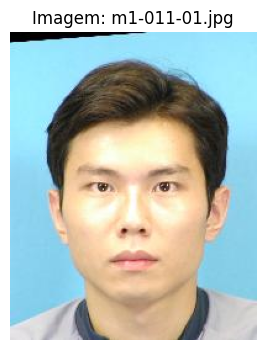

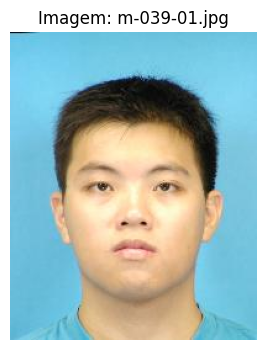

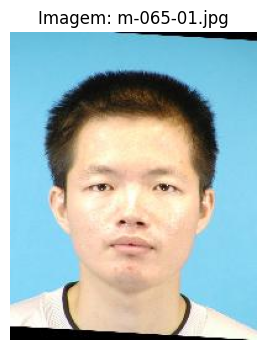

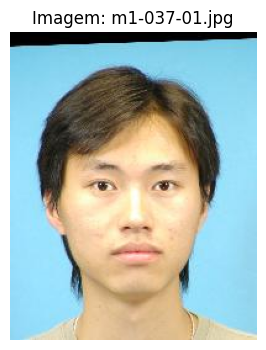

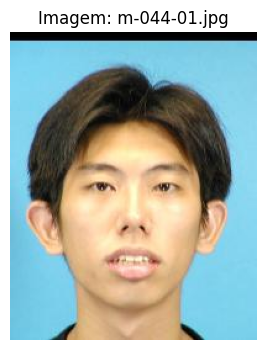

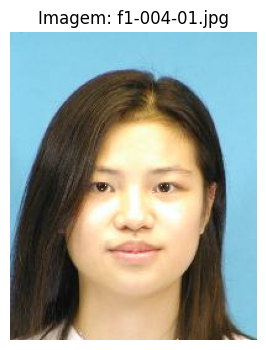

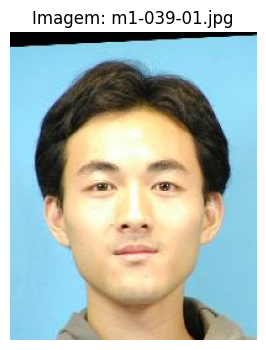

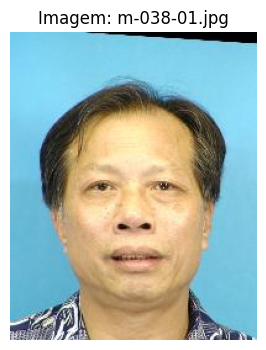

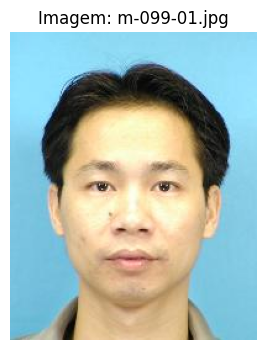

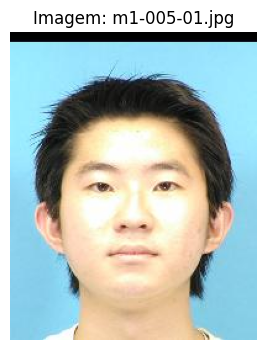

In [4]:
photos_folder = "photos"

# Listar os arquivos na pasta
files_in_photos = list_files_in_folder(photos_folder)

# Visualização de  algumas imagens
for i, file_name in enumerate(files_in_photos[:10]):  # exibição
    file_path = os.path.join(photos_folder, file_name)
    try:
        img = Image.open(file_path)  # Abrir a imagem usando Pillow
        plt.figure(figsize = (4, 4))  # Configurar o tamanho da figura
        plt.imshow(img)
        plt.title(f"Imagem: {file_name}")
        plt.axis('off')  # Ocultar os eixos
        plt.show()
    except Exception as e:
        print(f"Erro ao abrir a imagem {file_name}: {e}")

Podemos observar no dataset as imagens e alguns rotulos parecidos como 'm-039' e 'm1-039'.


In [5]:
# Subpastas existentes:

def list_subfolders(folder_path):
    """Lista todas as subpastas no diretório fornecido."""
    try:
        subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
        return subfolders
    except FileNotFoundError:
        print(f"Erro: Pasta não encontrada em {folder_path}")
        return []

photos_subfolders = list_subfolders(photos_folder)
print("Subpastas encontradas:", photos_subfolders)

Subpastas encontradas: []


## Sobre o dataset

In [6]:
# Filtrar imagens masculinas:
masc_images = [m for m in files_in_photos if m.startswith('m-')]
print(f"Imagens masculinas encontradas: {len(masc_images)}")

# Filtrar imagens femininas:
female_images = [f for f in files_in_photos if f.startswith('f-')]
print(f"Imagens femininas encontradas: {len(female_images)}")

Imagens masculinas encontradas: 93
Imagens femininas encontradas: 39


In [7]:
total_images = len(files_in_photos)
print(f"Total de imagens: {total_images}")
print(f"Proporção de imagens femininas: {len(female_images) / total_images:.2%}")
print(f"Proporção de imagens masculinas: {len(masc_images) / total_images:.2%}")

Total de imagens: 188
Proporção de imagens femininas: 20.74%
Proporção de imagens masculinas: 49.47%


In [8]:
# Identificar imagens não classificadas
outras_images = [f for f in files_in_photos if not f.startswith('f-') and not f.startswith('m-')]
print(f"Imagens não classificadas: {len(outras_images)} imagens.")

Imagens não classificadas: 56 imagens.


## Dividindo em Feminino e Masculino

In [9]:

feminino = []
masculino = []

for file in files_in_photos:
    # Se o nome do arquivo começa com 'f'
    if file.lower().startswith('f'):  # Para 'f' ou 'f1', 'f2', etc.
        feminino.append(file)
    elif file.lower().startswith('m'):  # Para 'm' ou 'm1', 'm2', etc.
        masculino.append(file)

# Exibindo os resultados
print(f"Total de imagens feminino: {len(feminino)}")
print(f"Total de imagens masculino: {len(masculino)}")


Total de imagens feminino: 54
Total de imagens masculino: 134


In [10]:
print(f"Total de imagens feminino: {len(feminino) / total_images:.2%}")
print(f"Total de imagens masculino: {len(masculino) / total_images:.2%}")

Total de imagens feminino: 28.72%
Total de imagens masculino: 71.28%


## Pré-processamento das imagens

In [11]:
# Definindo constantes para o processamento das imagens
IMG_HEIGHT = 200
IMG_WIDTH = 250
BATCH_SIZE = 32

def processar_imagens(lista_arquivos, label):
    """Processa as imagens
               e
    retorna arrays numpy com as imagens e seus rótulos."""
    imagens = []
    labels = []

    for arquivo in lista_arquivos:
        caminho = os.path.join(photos_folder, arquivo)
        try:
            img = Image.open(caminho)
            img = img.convert('RGB')
            img = img.resize((IMG_WIDTH, IMG_HEIGHT))
            img_array = np.array(img) / 255.0

            imagens.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Erro ao processar {arquivo}: {e}")

    return np.array(imagens), np.array(labels)

# Processando os conjuntos de dados
X_feminino, y_feminino = processar_imagens(feminino, 0)
X_masculino, y_masculino = processar_imagens(masculino, 1)

# Combinando os dados
X = np.concatenate([X_feminino, X_masculino])
y = np.concatenate([y_feminino, y_masculino])

# Dividindo em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Criando o modelo e realizando o treinamento

In [43]:
def criar_modelo():
    model = models.Sequential([
        layers.Conv2D(32,
                      (3, 3),
                      activation='relu',
                      input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3),
                      activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3),
                      activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Criando e compilando o modelo
model = criar_modelo()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Gerando novas imagens...
Processadas 10/54 imagens
Processadas 20/54 imagens
Processadas 30/54 imagens
Processadas 40/54 imagens
Processadas 50/54 imagens


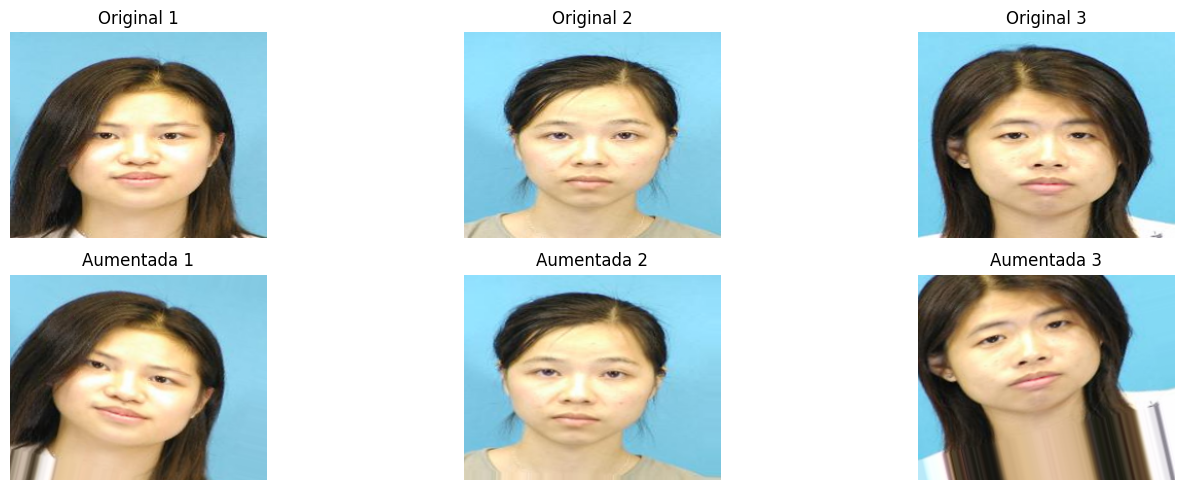


Estatísticas do dataset após augmentation:
Total de imagens femininas originais: 54
Total de imagens femininas após augmentation: 108
Total de imagens masculinas: 134
Total geral de imagens: 242


In [44]:
# Data augmentation para todas as imagens femininas
def aumentar_imagem_feminina(imagem):
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Preparando a imagem para augmentation
    img = imagem.reshape((1,) + imagem.shape)

    # Gerando uma nova imagem
    it = datagen.flow(img, batch_size=1)
    nova_imagem = next(it)[0]

    return nova_imagem

# Lista para armazenar as novas imagens
novas_imagens_femininas = []

# Gerando uma nova imagem para cada imagem feminina
print("Gerando novas imagens...")
for idx, imagem in enumerate(X_feminino):
    nova_imagem = aumentar_imagem_feminina(imagem)
    novas_imagens_femininas.append(nova_imagem)
    if (idx + 1) % 10 == 0:  # Mostrar progresso a cada 10 imagens
        print(f"Processadas {idx + 1}/{len(X_feminino)} imagens")

# Convertendo para array numpy
novas_imagens_femininas = np.array(novas_imagens_femininas)

plt.figure(figsize=(15, 5))
for i in range(3):
    # Imagem original
    plt.subplot(2, 3, i+1)
    plt.imshow(X_feminino[i])
    plt.title(f'Original {i+1}')
    plt.axis('off')

    # Imagem aumentada
    plt.subplot(2, 3, i+4)
    plt.imshow(novas_imagens_femininas[i])
    plt.title(f'Aumentada {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Adicionando as novas imagens ao conjunto de dados
X_feminino_aumentado = np.concatenate([X_feminino, novas_imagens_femininas])
y_feminino_aumentado = np.concatenate([y_feminino, np.zeros(len(novas_imagens_femininas))])  # 0 para feminino

# Atualizando os conjuntos de dados
X = np.concatenate([X_feminino_aumentado, X_masculino])
y = np.concatenate([y_feminino_aumentado, y_masculino])

# Dividindo em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nEstatísticas do dataset após augmentation:")
print(f"Total de imagens femininas originais: {len(X_feminino)}")
print(f"Total de imagens femininas após augmentation: {len(X_feminino_aumentado)}")
print(f"Total de imagens masculinas: {len(X_masculino)}")
print(f"Total geral de imagens: {len(X)}")

In [45]:
# Criando e compilando o modelo
model = criar_modelo()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test)
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.4830 - loss: 14.8327 - val_accuracy: 0.4286 - val_loss: 0.9950
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.6608 - loss: 5.6160 - val_accuracy: 0.8367 - val_loss: 0.6766
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7643 - loss: 2.2066 - val_accuracy: 0.4286 - val_loss: 0.6948
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6850 - loss: 1.4074 - val_accuracy: 0.4286 - val_loss: 0.7004
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6945 - loss: 0.4196 - val_accuracy: 0.4286 - val_loss: 0.7082
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6366 - loss: 0.5153 - val_accuracy: 0.4286 - val_loss: 0.7036
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6954 - loss: 0.4074 - val_accuracy: 0.4286 - val_loss: 0.7073
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7210 - loss: 0.3633 - val_accuracy: 0.4490 - val_loss: 0.7125
Epoch 9

# Avaliando o modelo

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step - accuracy: 0.8391 - loss: 0.5918

Acurácia no conjunto de teste: 0.8367


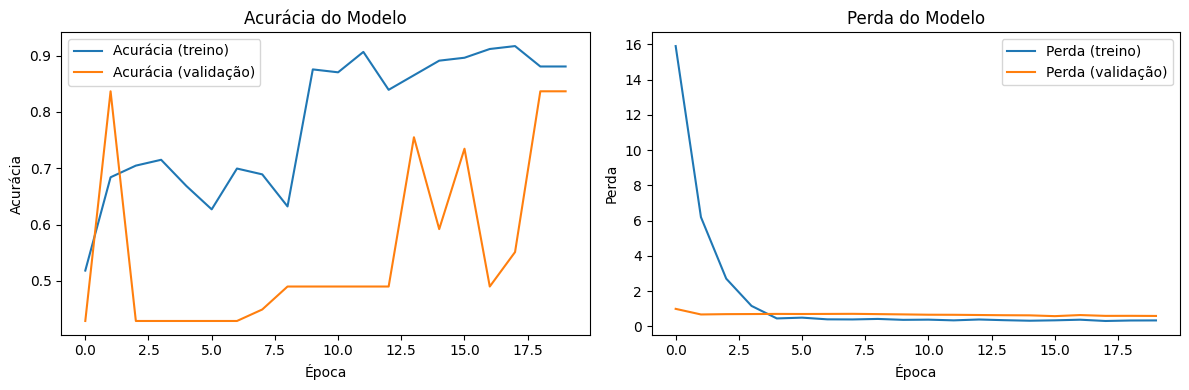

In [46]:
# Avaliando o modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nAcurácia no conjunto de teste: {test_accuracy:.4f}")

# Plotando o histórico de treinamento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia (treino)')
plt.plot(history.history['val_accuracy'], label='Acurácia (validação)')
plt.title('Acurácia do Modelo')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda (treino)')
plt.plot(history.history['val_loss'], label='Perda (validação)')
plt.title('Perda do Modelo')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step
Curva ROC:


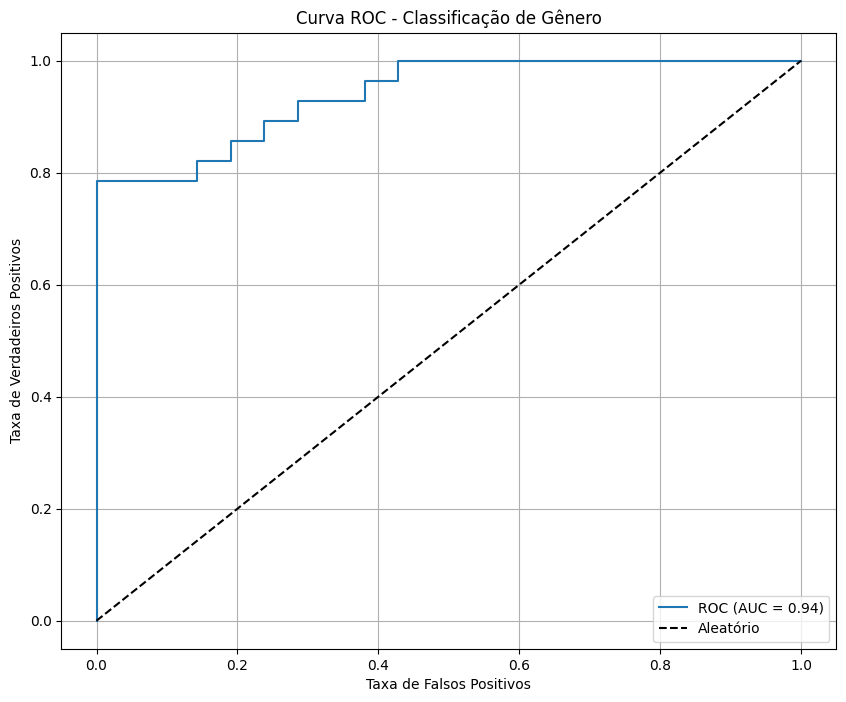

In [47]:
# Função para plotar a curva ROC
def plot_roc_curve(y_test, y_pred_prob):
    """
    Plota a curva ROC para classificação binária.
    y_test: valores reais (0 para feminino, 1 para masculino)
    y_pred_prob: probabilidades previstas pelo modelo
    """
    plt.figure(figsize=(10, 8))

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')

    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - Classificação de Gênero')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return roc_auc

# Fazendo previsões no conjunto de teste
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Plotando a curva ROC
print("Curva ROC:")
auc_score = plot_roc_curve(y_test, y_pred_prob)


## F1-score e Matriz de Confusão

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step


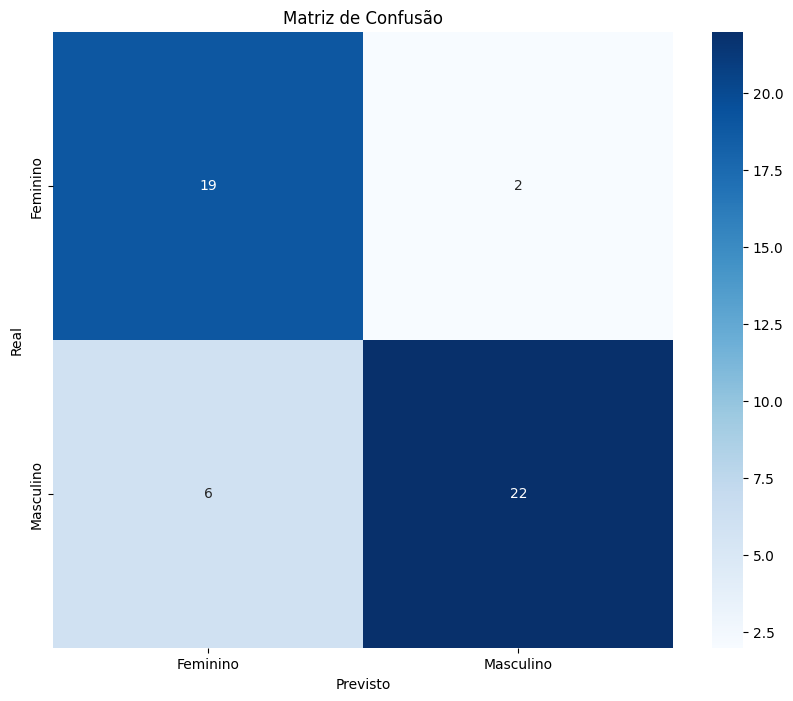


Resultados da Avaliação:
--------------------------------------------------
F1-Score: 0.8462

Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

    Feminino       0.76      0.90      0.83        21
   Masculino       0.92      0.79      0.85        28

    accuracy                           0.84        49
   macro avg       0.84      0.85      0.84        49
weighted avg       0.85      0.84      0.84        49


Detalhamento da Matriz de Confusão:
Verdadeiros Negativos (Feminino correto): 19
Falsos Positivos (Feminino classificado como Masculino): 2
Falsos Negativos (Masculino classificado como Feminino): 6
Verdadeiros Positivos (Masculino correto): 22

Métricas Adicionais:
Acurácia: 0.8367
Precisão: 0.9167
Recall: 0.7857


In [49]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns

def avaliar_modelo(y_test, y_pred):
    """
    Avalia o modelo usando múltiplas métricas:
    - Matriz de Confusão
    - F1-Score
    - Relatório de Classificação completo
    """
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Feminino', 'Masculino'],
                yticklabels=['Feminino', 'Masculino'])
    plt.title('Matriz de Confusão')
    plt.ylabel('Real')
    plt.xlabel('Previsto')
    plt.show()

    # F1-Score
    f1 = f1_score(y_test, y_pred)

    # Gerando relatório de classificação detalhado
    report = classification_report(y_test, y_pred,
                                 target_names=['Feminino', 'Masculino'])

    print("\nResultados da Avaliação:")
    print("-" * 50)
    print(f"F1-Score: {f1:.4f}")
    print("\nRelatório de Classificação Detalhado:")
    print(report)

    # Explicando a matriz de confusão
    tn, fp, fn, tp = cm.ravel()
    print("\nDetalhamento da Matriz de Confusão:")
    print(f"Verdadeiros Negativos (Feminino correto): {tn}")
    print(f"Falsos Positivos (Feminino classificado como Masculino): {fp}")
    print(f"Falsos Negativos (Masculino classificado como Feminino): {fn}")
    print(f"Verdadeiros Positivos (Masculino correto): {tp}")

    # Calculando métricas adicionais
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    print("\nMétricas Adicionais:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")


y_pred = (model.predict(X_test) > 0.5).astype(int)

# Avaliando o modelo
avaliar_modelo(y_test, y_pred)

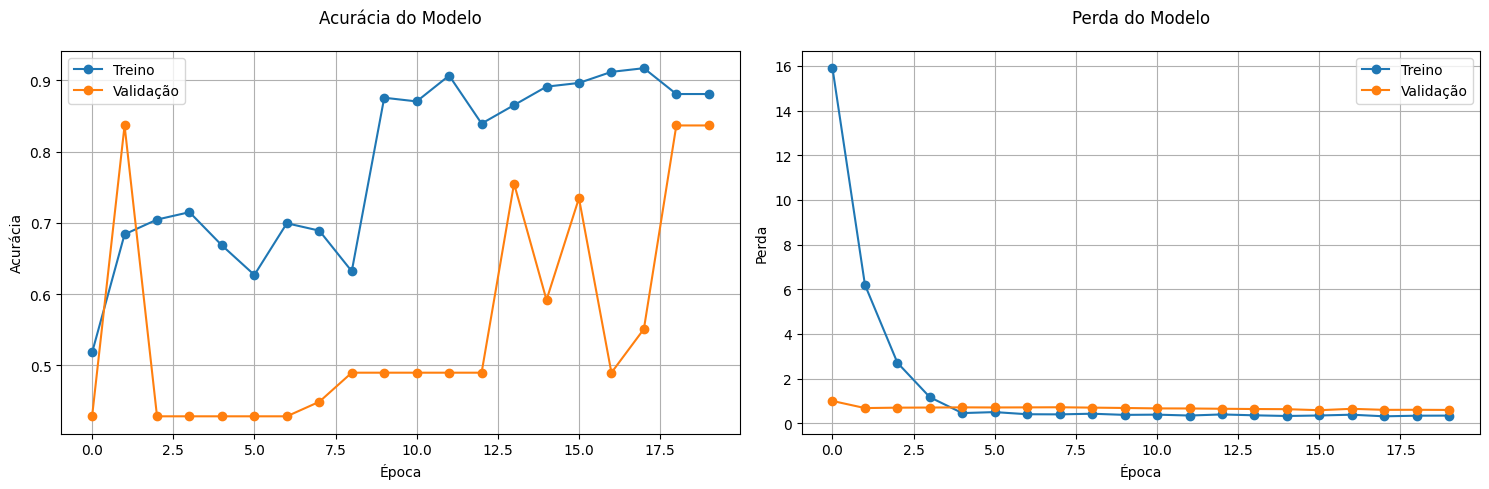


Estatísticas do Treinamento:
--------------------------------------------------
Número total de épocas: 20

Melhor Acurácia de Validação: 0.8367 (Época 2)
Acurácia de Treino correspondente: 0.6839

Melhor Perda de Validação: 0.5817 (Época 16)
Perda de Treino correspondente: 0.3442

Análise de Overfitting:
Diferença final entre acurácia de treino e validação: 0.0441
✅ Não há sinais claros de overfitting


In [50]:
def plot_training_history(history):
    """
    Plota o histórico de treinamento com estatísticas detalhadas.

    Args:
        history: objeto history retornado pelo treinamento do modelo
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plotar acurácia
    ax1.plot(history.history['accuracy'], label='Treino', marker='o')
    ax1.plot(history.history['val_accuracy'], label='Validação', marker='o')
    ax1.set_title('Acurácia do Modelo', pad=20)
    ax1.set_xlabel('Época')
    ax1.set_ylabel('Acurácia')
    ax1.legend()
    ax1.grid(True)

    # Plotar perda
    ax2.plot(history.history['loss'], label='Treino', marker='o')
    ax2.plot(history.history['val_loss'], label='Validação', marker='o')
    ax2.set_title('Perda do Modelo', pad=20)
    ax2.set_xlabel('Época')
    ax2.set_ylabel('Perda')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    print("\nEstatísticas do Treinamento:")
    print("-" * 50)

    # Melhor época para acurácia de validação
    best_val_acc_epoch = np.argmax(history.history['val_accuracy'])
    best_val_acc = np.max(history.history['val_accuracy'])

    # Melhor época para perda de validação
    best_val_loss_epoch = np.argmin(history.history['val_loss'])
    best_val_loss = np.min(history.history['val_loss'])

    print(f"Número total de épocas: {len(history.history['accuracy'])}")
    print(f"\nMelhor Acurácia de Validação: {best_val_acc:.4f} (Época {best_val_acc_epoch + 1})")
    print(f"Acurácia de Treino correspondente: {history.history['accuracy'][best_val_acc_epoch]:.4f}")

    print(f"\nMelhor Perda de Validação: {best_val_loss:.4f} (Época {best_val_loss_epoch + 1})")
    print(f"Perda de Treino correspondente: {history.history['loss'][best_val_loss_epoch]:.4f}")

    # Verificando overfitting
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_acc = history.history['accuracy'][-1]
    acc_diff = final_train_acc - final_val_acc

    print("\nAnálise de Overfitting:")
    print(f"Diferença final entre acurácia de treino e validação: {acc_diff:.4f}")
    if acc_diff > 0.1:
        print("⚠️ Possível overfitting detectado (diferença > 0.1)")
    else:
        print("✅ Não há sinais claros de overfitting")


plot_training_history(history)